In [69]:
import pandas as pd

In [50]:
# 폰트 설정 방법 1
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='Malgun Gothic') # For Windows

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

In [12]:
from database import DB
import pandas as pd

database = DB()
database.connect()

SQL = """
SELECT
music_songs.id, music_songs.name, music_songs.download_count,extract(day from (now()- music_songs.created_at)) as after_days,
music_songs.composer, (music_songs.download_count / extract(day from (now()- music_songs.created_at))) as download_per_days
FROM music_songs
WHERE music_songs.is_visible = 'true'
AND music_songs.download_count != 0
AND music_songs.is_free = 'false'
AND NOT music_songs.composer IS NULL
AND music_songs.composer != '이영훈'
AND music_songs.composer != '정승호'
AND music_songs.composer != '김진혁'
ORDER BY download_per_days DESC
"""

df = pd.read_sql(SQL,database.connect()[1])

In [13]:
df['URL'] = df['id'].apply(lambda x : 'https://www.mewpot.com/songs/' + str(x))

In [14]:
df = df.sort_values('download_per_days',ascending=False)

* 현재시점으로 하루에 몇번 다운로드 되었는지 확인합니다.

In [15]:
df['after_days']= df['after_days'].apply(lambda x: (int(x)))

In [16]:
df

id                   name  download_count  after_days composer  \
0    6260             아기 고양이 6마리              35          12      김지은   
1    6199                 행복한 일상             102          40      김동욱   
2    6149   맑은 아침 (Full Version)             171          72      김동욱   
3    6256             잔잔하게 리듬타볼까              28          12      여준표   
4    6162  Errday (Full Version)             151          65      김동욱   
..    ...                    ...             ...         ...      ...   
350  6159   Twinkle Drop (Short)               3          72      김동욱   
351  6155   아무아리움 (Full Version)               3          72      김동욱   
352  4115           미션 중 긴장되는 순간              15         366      조은기   
353  6090               Sad Eyes               6         156      이용우   
354  4099                 나른한 일상               8         366    디플로피아   

     download_per_days                                URL  
0             2.916667  https://www.mewpot.com/songs/6260  
1             2.550000  https://www.mewpot.com/songs/6199  
2             2.375000  https://www.mewpot.com/songs/6149  
3             2.333333  https://www.mewpot.com/songs/6256  
4             2.323077  https://www.mewpot.com/songs/6162  
..                 ...                                ...  
350           0.041667  https://www.mewpot.com/songs/6159  
351           0.041667  https://www.mewpot.com/songs/6155  
352           0.040984  https://www.mewpot.com/songs/4115  
353           0.038462  https://www.mewpot.com/songs/6090  
354           0.021858  https://www.mewpot.com/songs/4099  

[355 rows x 7 columns]

### 2.하루에 한곡이상 다운 받고 있는 곡들을 누가 많이 만들었는가?
* 추가 idea : 과거에 인기가 많았지만 현재는 인기 없는 곡?

In [65]:
df2 = df.copy()
df2 = df2[df2['download_per_days'] > 1]
df2.head(15)

id                       name  download_count  after_days composer  \
0   6260                 아기 고양이 6마리              35          12      김지은   
1   6199                     행복한 일상             102          40      김동욱   
2   6149       맑은 아침 (Full Version)             171          72      김동욱   
3   6256                 잔잔하게 리듬타볼까              28          12      여준표   
4   6162      Errday (Full Version)             151          65      김동욱   
5   6255                   놀고싶은 강아지              46          22      김지은   
6   6288                 가볍게 떠나는 여행               4           2      우지윤   
7   6073                 Ringa Ring             365         190      이현호   
8   6265                     피크닉 가자              23          12      김지은   
9   6151       연못 이슬 (Full Version)             134          72      김동욱   
10  6207                  조금 빠른 거북이              74          40     Hydn   
11  6201                   어쩌면 잘될거야              72          40      김동욱   
12  6279                    낡은 러브레터               9           5      우지윤   
13  6109  니가 먼저 했잖아 (Full Verseion)             219         122      김동욱   
14  6254                 산뜻하게 출발해볼까              39          22      김동욱   

    download_per_days                                URL  
0            2.916667  https://www.mewpot.com/songs/6260  
1            2.550000  https://www.mewpot.com/songs/6199  
2            2.375000  https://www.mewpot.com/songs/6149  
3            2.333333  https://www.mewpot.com/songs/6256  
4            2.323077  https://www.mewpot.com/songs/6162  
5            2.090909  https://www.mewpot.com/songs/6255  
6            2.000000  https://www.mewpot.com/songs/6288  
7            1.921053  https://www.mewpot.com/songs/6073  
8            1.916667  https://www.mewpot.com/songs/6265  
9            1.861111  https://www.mewpot.com/songs/6151  
10           1.850000  https://www.mewpot.com/songs/6207  
11           1.800000  https://www.mewpot.com/songs/6201  
12           1.800000  https://www.mewpot.com/songs/6279  
13           1.795082  https://www.mewpot.com/songs/6109  
14           1.772727  https://www.mewpot.com/songs/6254

In [44]:
df2_pivot = pd.pivot_table(data = df2 , index = ['composer'],
               values = ['download_per_days'],
              aggfunc = ['count', 'mean'])
df2_pivot

count              mean
         download_per_days download_per_days
composer                                    
Hydn                     8          1.433837
김동욱                     16          1.588767
김지은                      3          2.308081
여준표                      1          2.333333
우지윤                      5          1.600000
이현호                      8          1.471964
조은기                      1          1.120482
홍석준                      1          1.500000

Text(0, 0.5, '곡 제작 횟수')

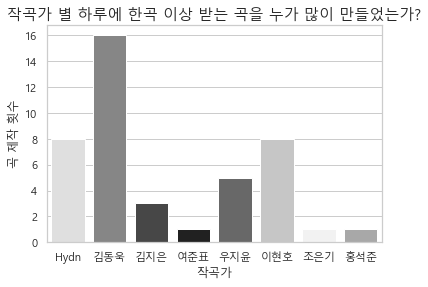

In [63]:
import seaborn as sns
import matplotlib as plt
data = df2_pivot[('mean', 'download_per_days')]
pal = sns.color_palette("Greys_r",  len(data))
rank = data.argsort().argsort() 
ax = sns.barplot(x=df2_pivot.index, y=('count', 'download_per_days'), data=df2_pivot, palette=np.array(pal[::-1])[rank])
ax.set_title('하루에 한곡 이상 다운로드 곡을 누가 많이 만들었는가?', fontsize = 15)
ax.set_xlabel('작곡가')
ax.set_ylabel('곡 제작 횟수')

# sound effect

In [66]:
df2 = pd.read_csv('sound_effects.csv')

In [76]:
df2['download_per_days'] = df2['download_count'] / df2['after_days']

In [78]:
df2 = df2.sort_values('download_per_days',ascending=False)

In [83]:
df2['URL'] = df2['id'].apply(lambda x : 'https://www.mewpot.com/sound-effects/' + str(x))

In [84]:
df2

id                    name  after_days  download_count  is_free  \
1910  1358        Magic Wand Noise         733         4005260     True   
49     975                   Ta Da         809         4016957     True   
967    982                     Jab         809         4006043     True   
1894   121   Cinematic Harsh Light         809         4000350     True   
2990   439                Shot Gun         809         3106836     True   
...    ...                     ...         ...             ...      ...   
209   1970                     다섯시         710               1    False   
2039  2161                      한시         710               1    False   
1     2072  옛날에 아주아주 무서운 도깨비가 살았어요         710               1    False   
865   1971                      달려         710               1    False   
1192  2054                    약속이야         710               1    False   

      download_per_days                                        URL  
1910        5464.201910  https://www.mewpot.com/sound-effects/1358  
49          4965.336218   https://www.mewpot.com/sound-effects/975  
967         4951.845488   https://www.mewpot.com/sound-effects/982  
1894        4944.808405   https://www.mewpot.com/sound-effects/121  
2990        3840.341162   https://www.mewpot.com/sound-effects/439  
...                 ...                                        ...  
209            0.001408  https://www.mewpot.com/sound-effects/1970  
2039           0.001408  https://www.mewpot.com/sound-effects/2161  
1              0.001408  https://www.mewpot.com/sound-effects/2072  
865            0.001408  https://www.mewpot.com/sound-effects/1971  
1192           0.001408  https://www.mewpot.com/sound-effects/2054  

[2997 rows x 7 columns]

In [85]:
df2.to_excel('sound_effect.xlsx',index=False ,encoding="utf-8-sig")

### 3. 유저별 키워드 검색 경향을 파악합니다.

In [66]:
song = df.copy()
sound_effect =df2.copy()

In [84]:
from database import DB
import pandas as pd

database = DB()
database.connect()

keyword_SQL = '''
SELECT 
download.keyword, download.model_type, download.user_id, 
download.created_at,download.count,'download' as "action"
FROM admin_statistic_downloads_by_session_keyword as download
INNER JOIN users ON download.user_id = users.id
AND users.role != 16

UNION ALL

SELECT 
play.keyword, play.music_type, play.user_id, 
play.created_at,play.count, 'play' as "action"
FROM admin_statistic_plays_by_session_keyword as play
INNER JOIN users ON play.user_id = users.id
AND users.role != 16

ORDER by user_id
'''

keyword  = pd.read_sql(keyword_SQL,database.connect()[1])

In [85]:
# null 제거
# 나중에 null 값만 모아서 회원가입하지 않은 유저라고 판단합니다.
dropna_keyword = keyword.dropna()
dropna_keyword.head()

keyword   model_type  user_id                 created_at  count action
0            비트  Music::Song       12 2021-02-16 10:52:30.089283     31   play
1           스포츠  Music::Song       12 2021-02-16 10:46:57.467660     26   play
2  어두운+밤이되면(MR)  Music::Song       30 2021-01-28 16:37:16.963209      1   play
3           스포츠  Music::Song      425 2021-02-25 00:21:20.472397     19   play
4       여행+Vlog  Music::Song      621 2021-02-05 23:40:09.153506      2   play

In [86]:
# 유저별 플레이 순서를 keyword별로 순서를 확인합니다.
# play_keyword = dropna_keyword[dropna_keyword['action'] == 'play']
play_keyword = dropna_keyword.copy()
play_keyword['user_id'] = play_keyword['user_id'].apply(int)

play_keyword['model_type'] = play_keyword['model_type'].apply(lambda x: 'song' if x=='Music::Song' else 'sfx')


In [87]:
play_keyword = play_keyword.sort_values(['user_id','created_at'],ascending=True)

In [76]:
# play_keyword['keyword'] = play_keyword['keyword'].apply(lambda x: x.replace("+", ','))
# play_keyword['keyword'] = play_keyword['keyword'].apply(lambda x: x[:-1] if x[-1]==',' else x)

In [89]:
result = play_keyword.groupby('user_id').aggregate(lambda tdf: tdf.tolist()).loc[:,['keyword', 'model_type', 'action']]

In [98]:
result['length'] = result['keyword'].apply(lambda x : len(x)) 
result['song_sfx_search'] = result['model_type'].apply(lambda x : len(list(set(x))))

In [106]:
result =  result[(result['length']  > 10) & (result['song_sfx_search'] == 2)] 

In [111]:
result.sort_values('length', ascending = True).head(15).iloc[:, :-2]

keyword  \
user_id                                                      
52863    [오프닝, 오프닝, 궁금증, 게임방송, 당황, 자막등장, 자막등장, 웅장한, 웅장한...   
52885     [장면전환, 예능, 일상, 달달, 오프닝, 공포, 공포, 공포, 배경음, 게임, 게임]   
41338    [오프닝, 장면전환, 달달, 예능, 일상, 토크, 자막등장, 자막등장, 예능, 오프...   
55592    [경고, 경고, 날아감, 등장, 등장, 예능, 오프닝, 오프닝, 소리효과, 소리효과...   
54010    [등장, 날아감, 날아감, 실패, 실패, 실패, 자막등장, 실패, 실패, 까마귀, ...   
52779    [리그오브레전드, 리그오브레전드, 장면전환, 장면전환, 마우스, 마우스, 질문, 궁...   
52717     [팡, 날아감, 알림, 게임, 게임, 팝업, 자막등장, 휙, 포션, 체력.회복, 회복]   
54140    [짜잔, tada, tada, 비행기, 놀람, 놀람, 띠용, 자막등장, 등장, 팝업...   
54148     [딩동댕, 딩동댕, 땡, 틀림, 퀴즈, 퀴즈, 소리효과, 긴장감, 긴장감, 땡, 오답]   
55670    [자막등장, 자막등장, 마우스, 자막등장, 자막등장, 빠밤, 빠밤, 마우스, 오프닝...   
54951    [빨리감기, 빨리감기, 장면전환, 장면전환, 장면전환, 소리효과, 소리효과, 사람+...   
52888    [오프닝, 오프닝, 재즈, 먹방, 신남, 오프닝, 잔잔, 자막등장, 뿅, 띠로링, ...   
46040    [웅장, 오프닝, 피아노, 자연소리, 피아노, 여행 Vlog, 여행 Vlog, 오프...   
55758    [자막등장, 자막등장, 장면전환, 장면전환, 성공, 성공, 성공, 공격, 공격, P...   
55774          [돈, 돈, 돈, 등장, 등장, 예능, 토크, 코믹, 등장, 팝업, 자막등장]   

                                                model_type  \
user_id                                                      
52863    [song, song, song, song, song, sfx, sfx, sfx, ...   
52885    [song, song, song, song, song, song, song, son...   
41338    [song, song, song, song, song, song, song, sfx...   
55592    [sfx, sfx, sfx, sfx, sfx, song, song, song, so...   
54010    [sfx, sfx, song, sfx, song, sfx, song, song, s...   
52779    [sfx, sfx, song, sfx, sfx, sfx, sfx, sfx, sfx,...   
52717    [sfx, sfx, sfx, song, sfx, sfx, sfx, sfx, sfx,...   
54140    [sfx, sfx, sfx, sfx, song, sfx, sfx, sfx, sfx,...   
54148    [sfx, sfx, sfx, sfx, song, sfx, sfx, song, sfx...   
55670    [song, sfx, sfx, song, sfx, song, sfx, sfx, so...   
54951    [sfx, sfx, song, sfx, sfx, sfx, sfx, song, sfx...   
52888    [song, song, song, song, song, song, song, sfx...   
46040    [song, song, song, sfx, song, song, song, song...   
55758    [sfx, sfx, song, sfx, song, sfx, sfx, sfx, sfx...   
55774    [song, sfx, sfx, sfx, sfx, song, song, song, s...   

                                                    action  
user_id                                                     
52863    [download, play, play, play, play, download, p...  
52885    [play, play, play, play, play, play, play, dow...  
41338    [play, play, play, play, play, play, play, pla...  
55592    [download, play, play, download, play, play, d...  
54010    [play, play, play, play, play, play, play, pla...  
52779    [play, download, play, play, play, download, p...  
52717    [play, play, play, play, play, play, play, pla...  
54140    [play, play, download, play, play, play, play,...  
54148    [play, play, play, play, play, play, play, pla...  
55670    [play, play, play, play, play, play, play, pla...  
54951    [play, download, play, download, play, downloa...  
52888    [play, download, play, play, play, play, play,...  
46040    [play, play, play, play, play, play, download,...  
55758    [download, play, play, play, play, download, p...  
55774    [play, play, download, play, download, play, p...

### 한달전 곡 정보

In [113]:
from database import DB
import pandas as pd

database = DB()
database.connect()

SQL = """
SELECT download.model_id, download.model_type, download.user_id,
download.created_at, download.
FROM admin_statistic_downloads as download
WHERE download.created_at  BETWEEN (now() - interval '12 month')  AND (now() - interval '11 month')
AND download.user_id != 1
ORDER BY user_id DESC
"""

df  = pd.read_sql(SQL,database.connect()[1])

In [139]:
before_user_sub = df.copy().iloc[:, :-1].drop_duplicates()
song_sub = before_user_sub[before_user_sub['model_type'] == "Music::Song"]
grouped_song_sub = song_sub.groupby('model_id').count().sort_values('user_id', ascending = False).iloc[:,:1]
grouped_song_sub.columns = ['count']
grouped_song_sub = grouped_song_sub.reset_index()

In [140]:
grouped_song_sub 

model_id  count
0        2927    233
1        2948    207
2        2717    181
3        2800    167
4        2724    166
..        ...    ...
619      3146      1
620      2750      1
621      3889      1
622      3905      1
623      3742      1

[624 rows x 2 columns]

In [145]:
grouped_song_sub['URL'] = grouped_song_sub ['model_id'].apply(lambda x : 'https://www.mewpot.com/songs/' + str(x))

In [151]:
# 평균 이상만 사용
grouped_song_sub = grouped_song_sub[grouped_song_sub['count'] > 12]

In [153]:
grouped_song_sub.to_excel('before_year_song2.xlsx')

In [2]:
grouped_song_sub['model_id']

NameError: name 'grouped_song_sub' is not defined

In [ ]:
## 여기에 subscribe 까지 추가고려
## pakage구매도 가능하다면 고려

In [331]:
subscribe = pd.read_csv('subscribe.csv').sort_values(['user_id', 'created_at'])

In [332]:
subscribe

keyword    model_type  user_id                  created_at  count  \
60    subscription  subscription       30  2019-09-26 16:29:03.116161      1   
58    subscription  subscription       30  2019-09-26 16:42:16.681926      1   
63    subscription  subscription       30  2019-12-13 12:03:51.322701      1   
64    subscription  subscription       30  2019-12-13 12:05:14.544091      1   
55    subscription  subscription       30  2020-02-03 12:00:41.823844      1   
...            ...           ...      ...                         ...    ...   
6303  subscription  subscription    56546  2021-03-08 11:07:44.017463      1   
6339  subscription  subscription    56573  2021-03-08 15:04:44.892247      1   
6342  subscription  subscription    56590  2021-03-08 20:02:16.155776      1   
6343  subscription  subscription    56593   2021-03-08 20:46:03.68972      1   
6324  subscription  subscription    56617  2021-03-09 01:11:13.812715      1   

            action  
60    subscription  
58    subscription  
63    subscription  
64    subscription  
55    subscription  
...            ...  
6303  subscription  
6339  subscription  
6342  subscription  
6343  subscription  
6324  subscription  

[6345 rows x 6 columns]

In [352]:
pivot_sub = pd.pivot_table(subscribe, index = ['user_id'],
              values = ['created_at', 'count'],
              aggfunc = ['min', 'sum']).iloc[:,1:].reset_index()

In [355]:
pivot_sub.columns = ['user_id','created_at', 'count']

In [356]:
pivot_sub['action'] = 'subscription'
pivot_sub['keyword'] = 'subscription'
pivot_sub['model_type'] = 'subscription'

In [357]:
pivot_sub =pivot_sub[['keyword', 'model_type','user_id','created_at', 'count', 'action']]

In [1]:
pivot_sub

NameError: name 'pivot_sub' is not defined

In [361]:
user_action = pd.concat([play_keyword, pivot_sub])

In [362]:
result = user_action.groupby('user_id').aggregate(lambda tdf: tdf.tolist()).loc[:,['keyword', 'model_type', 'action']]
result.to_excel('user_action.xlsx')

In [363]:
result

keyword  \
user_id                                                      
12                                               [스포츠, 비트]   
30                            [어두운,밤이되면(MR), subscription]   
40                                          [subscription]   
161                                         [subscription]   
256                                         [subscription]   
...                                                    ...   
56603    [장면전환, 장면전환, 장면전환, 장면전환, 오프닝, 오프닝, 예능, 예능, 경고,...   
56605                   [뾱,빠지는,소리, 뽀옹, 귀여운, 귀여운, 귀여운, 귀여운]   
56607                                         [등장, 등장, 등장]   
56611    [휙, 슈욱, 슉, 휙,장면,전환음, 휙,장면,전환음, Transition, Tra...   
56617                                       [subscription]   

                                                model_type  \
user_id                                                      
12                                            [song, song]   
30                                    [song, subscription]   
40                                          [subscription]   
161                                         [subscription]   
256                                         [subscription]   
...                                                    ...   
56603    [song, sfx, sfx, sfx, song, song, song, song, ...   
56605                     [sfx, sfx, song, sfx, song, sfx]   
56607                                      [sfx, sfx, sfx]   
56611      [sfx, sfx, sfx, song, sfx, song, sfx, sfx, sfx]   
56617                                       [subscription]   

                                                    action  
user_id                                                     
12                                            [play, play]  
30                                    [play, subscription]  
40                                          [subscription]  
161                                         [subscription]  
256                                         [subscription]  
...                                                    ...  
56603    [play, play, download, play, play, download, d...  
56605                 [play, play, play, play, play, play]  
56607                               [play, download, play]  
56611    [play, play, play, play, play, play, play, pla...  
56617                                       [subscription]  

[7131 rows x 3 columns]